**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

1) Aplique os filtros  Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

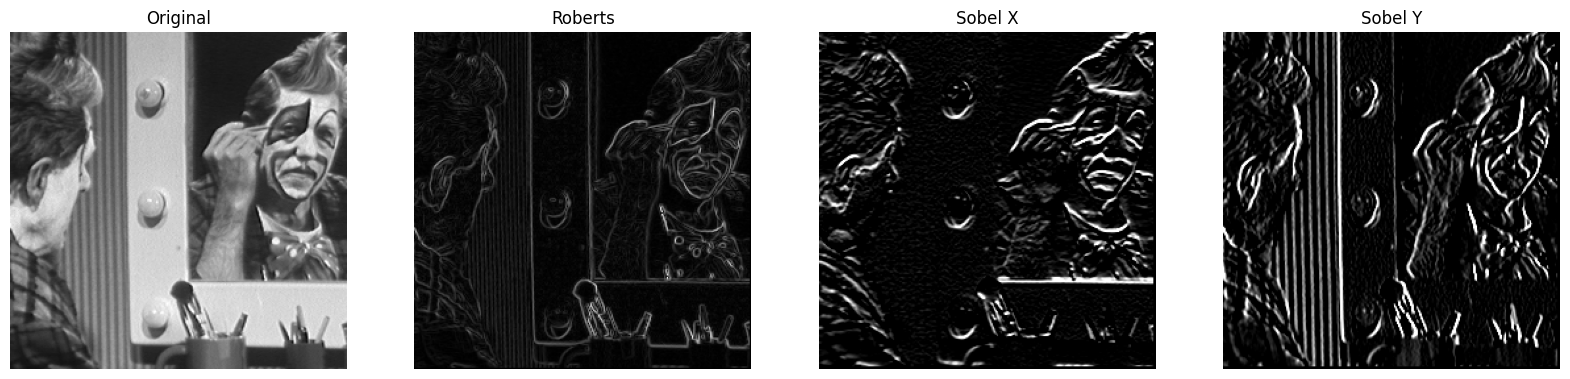

In [34]:
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

def roberts(img):
    kernel_h1 = np.array([[1,  0],
                          [0, -1]])
    
    kernel_h2 = np.array([[0,  1], 
                          [-1, 0]])
    
    height, width = img.shape
    new_img = np.zeros(img.shape, dtype=img.dtype)

    for i in range(width - 1):
        for j in range(height - 1):
            region = img[i:i + 2, j:j + 2]
            
            f1 = np.sum(region * kernel_h1)
            f2 = np.sum(region * kernel_h2)
        
            new_img[i, j] = math.sqrt(f1 ** 2 + f2 ** 2)
    
    return new_img

def sobel(img):
    width, height = img.shape

    kernel_h1 = [[-1,  -2, -1], 
                 [ 0,   0,  0], 
                 [ 1,   2,  1]]
    
    kernel_h2 = [[-1, 0, 1], 
                 [-2, 0, 2], 
                 [-1, 0, 1]]
    
    grad_x = np.zeros(img.shape, dtype=img.dtype)
    grad_y = np.zeros(img.shape, dtype=img.dtype)

    for i in range(width - 2):
        for j in range(height - 2):
            region = img[i:i+3, j:j+3]

            f1 = np.sum(region * kernel_h1)
            f2 = np.sum(region * kernel_h2)

            grad_x[i, j] = min(255, max(0, f1))
            grad_y[i, j] = min(255, max(0, f2))
            
    return grad_x, grad_y
            


plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title("Original")

plt.subplot(1,4,2)
plt.imshow(roberts(img1), cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Roberts")


sobel_x, sobel_y = sobel(img1)
plt.subplot(1,4,3)
plt.imshow(sobel_x, cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Sobel X")

plt.subplot(1,4,4)
plt.imshow(sobel_y, cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Sobel Y")

plt.show()


2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

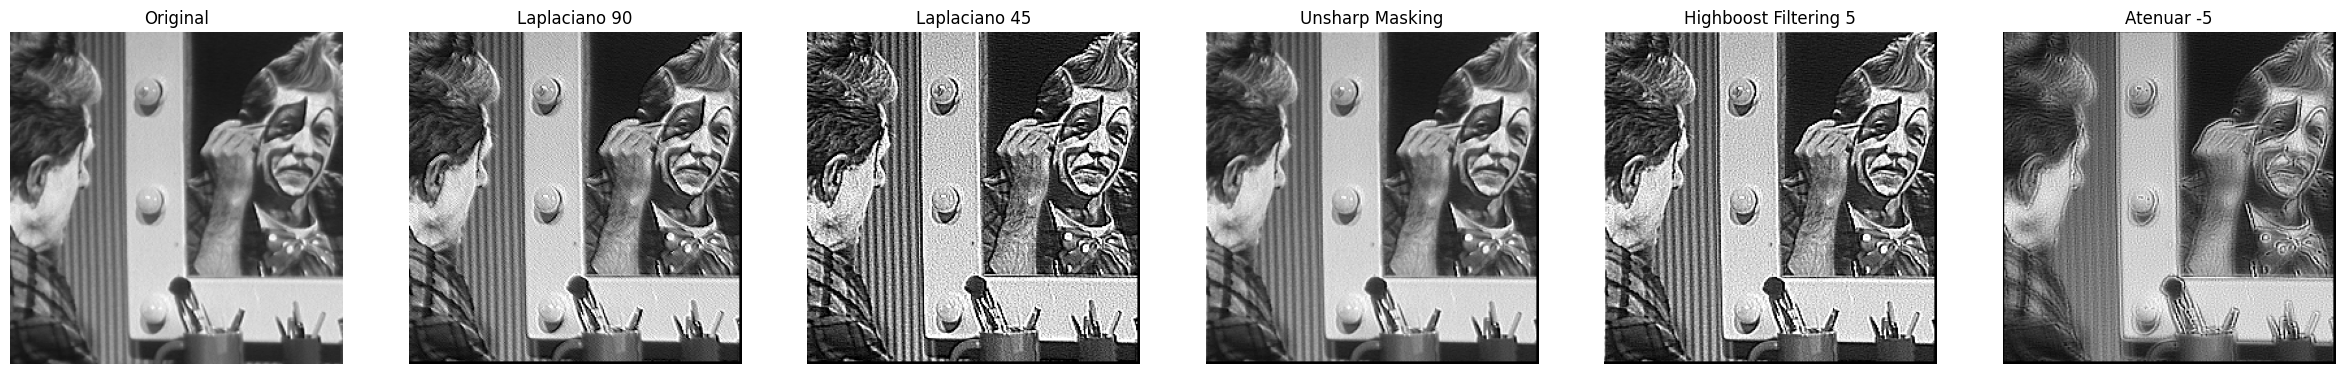

In [35]:
# code here

img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

def laplace(img, use90 = True):
    width, height = img.shape

    kernel =  [[ 0,   -1,  0], 
               [ -1,  4,  -1], 
               [ 0,   -1,  0]] if use90 else [[ -1,   -1,  -1], 
                                             [ -1,  8,  -1], 
                                             [ -1,   -1,  -1]]
    
    
    new_img = np.zeros(img.shape, dtype=img.dtype)

    for i in range(width - 2):
        for j in range(height - 2):
            region = img[i:i+3, j:j+3]
            value = np.sum(region * kernel) + img[i,j]
            new_img[i, j] = min(255, max(0, value))
            
    return new_img

def image_blur(img, _kernel_size): #funcao do lab 4
    width, height = img.shape

    kernel_size = _kernel_size
    half_kernel = kernel_size // 2
    new_img = np.zeros_like(img)

    for i in range(half_kernel, width - half_kernel):
        for j in range(half_kernel, height - half_kernel):
            pixels = img[i - half_kernel: i + half_kernel + 1, j - half_kernel: j + half_kernel + 1]
            new_pixel = np.mean(pixels)
            new_img[i, j] = new_pixel
    return new_img

def sharpen(img, k = 1):
    width, height = img.shape
    
    blurred_img = image_blur(img, _kernel_size = 3)
    
    new_img = np.zeros(img.shape, dtype=img.dtype)

    for i in range(width - 2):
        for j in range(height - 2):
            mask = np.int16(img[i, j]) - np.int16(blurred_img[i, j])
            value = img[i, j] + k * mask
            new_img[i, j] = min(255, max(0, value))
            
    return new_img


plt.figure(figsize=(30,10))
plt.subplot(1,6,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title("Original")

plt.subplot(1,6,2)
plt.imshow(laplace(img1), cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Laplaciano 90")

plt.subplot(1,6,3)
plt.imshow(laplace(img1, use90= False), cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Laplaciano 45")

plt.subplot(1,6,4)
plt.imshow(sharpen(img1, k = 1), cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Unsharp Masking")

plt.subplot(1,6,5)
plt.imshow(sharpen(img1, k = 5), cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Highboost Filtering 5")

plt.subplot(1,6,6)
plt.imshow(sharpen(img1, k = -5), cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Atenuar -5")

plt.show()


3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

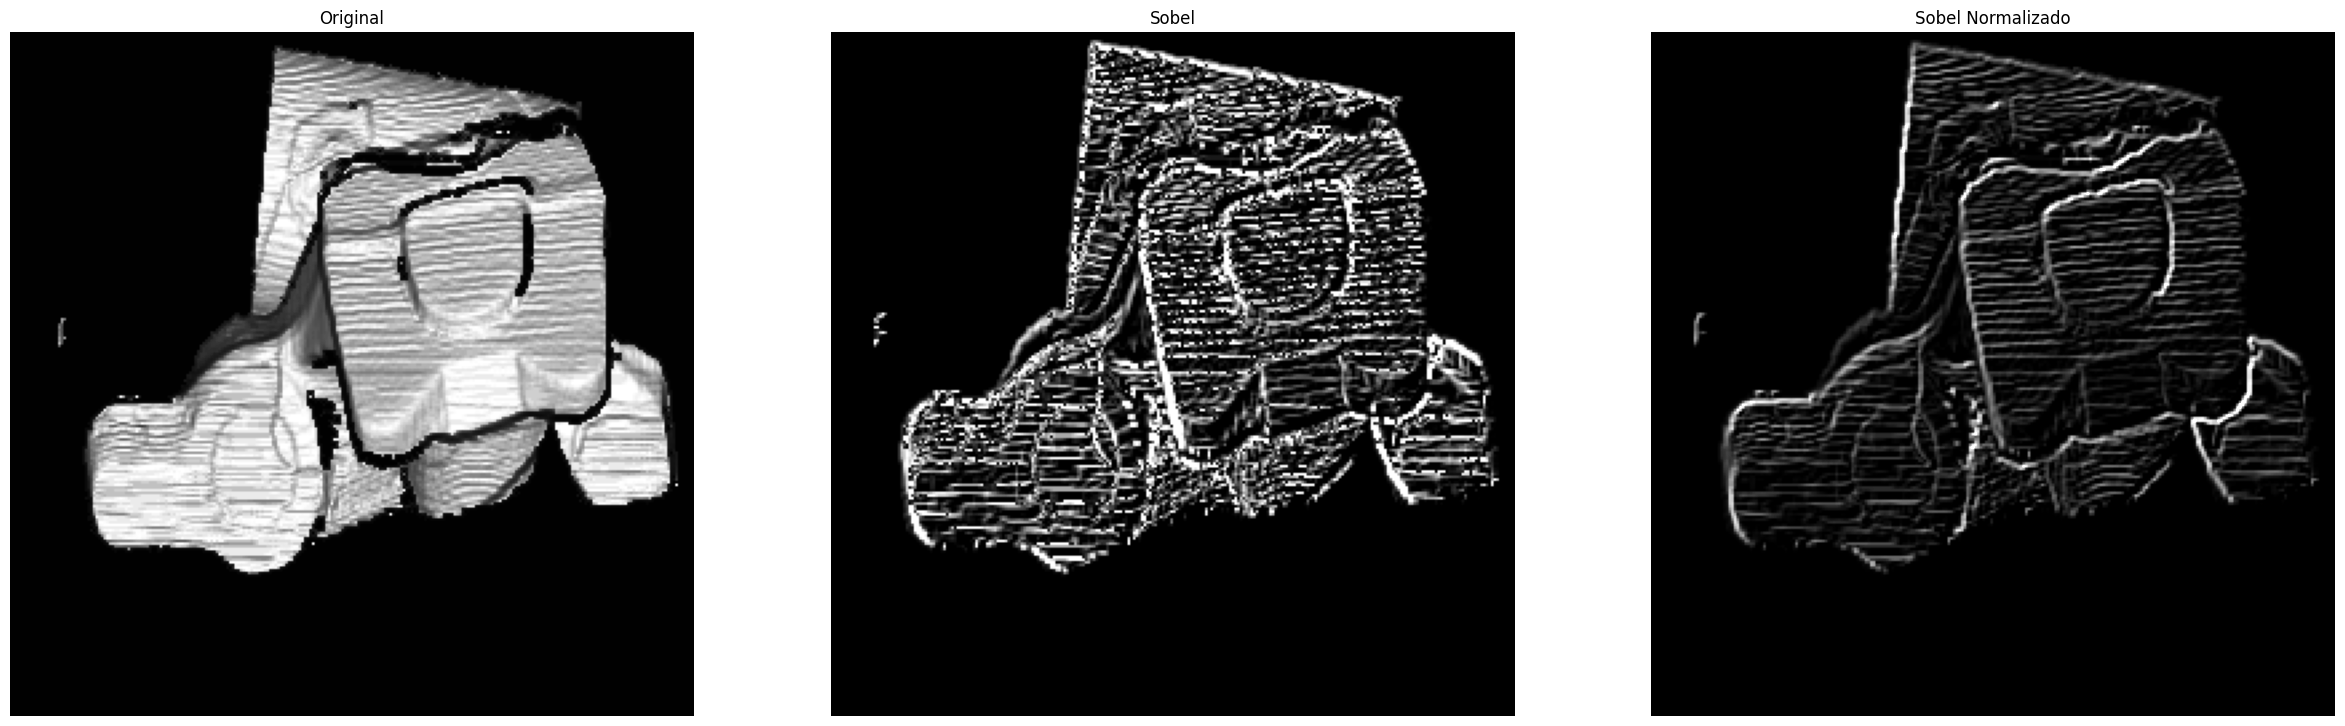

In [36]:
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title("Original")

sobel_x, sobel_y = sobel(img1)

new_img = sobel_x  + sobel_y

plt.subplot(1,3,2)
plt.imshow(new_img, cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Sobel")

sobel_x, sobel_y = sobel(img1* 0.25)

new_img = sobel_x  + sobel_y

plt.subplot(1,3,3)
plt.imshow(new_img, cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Sobel Normalizado")

plt.show()



4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

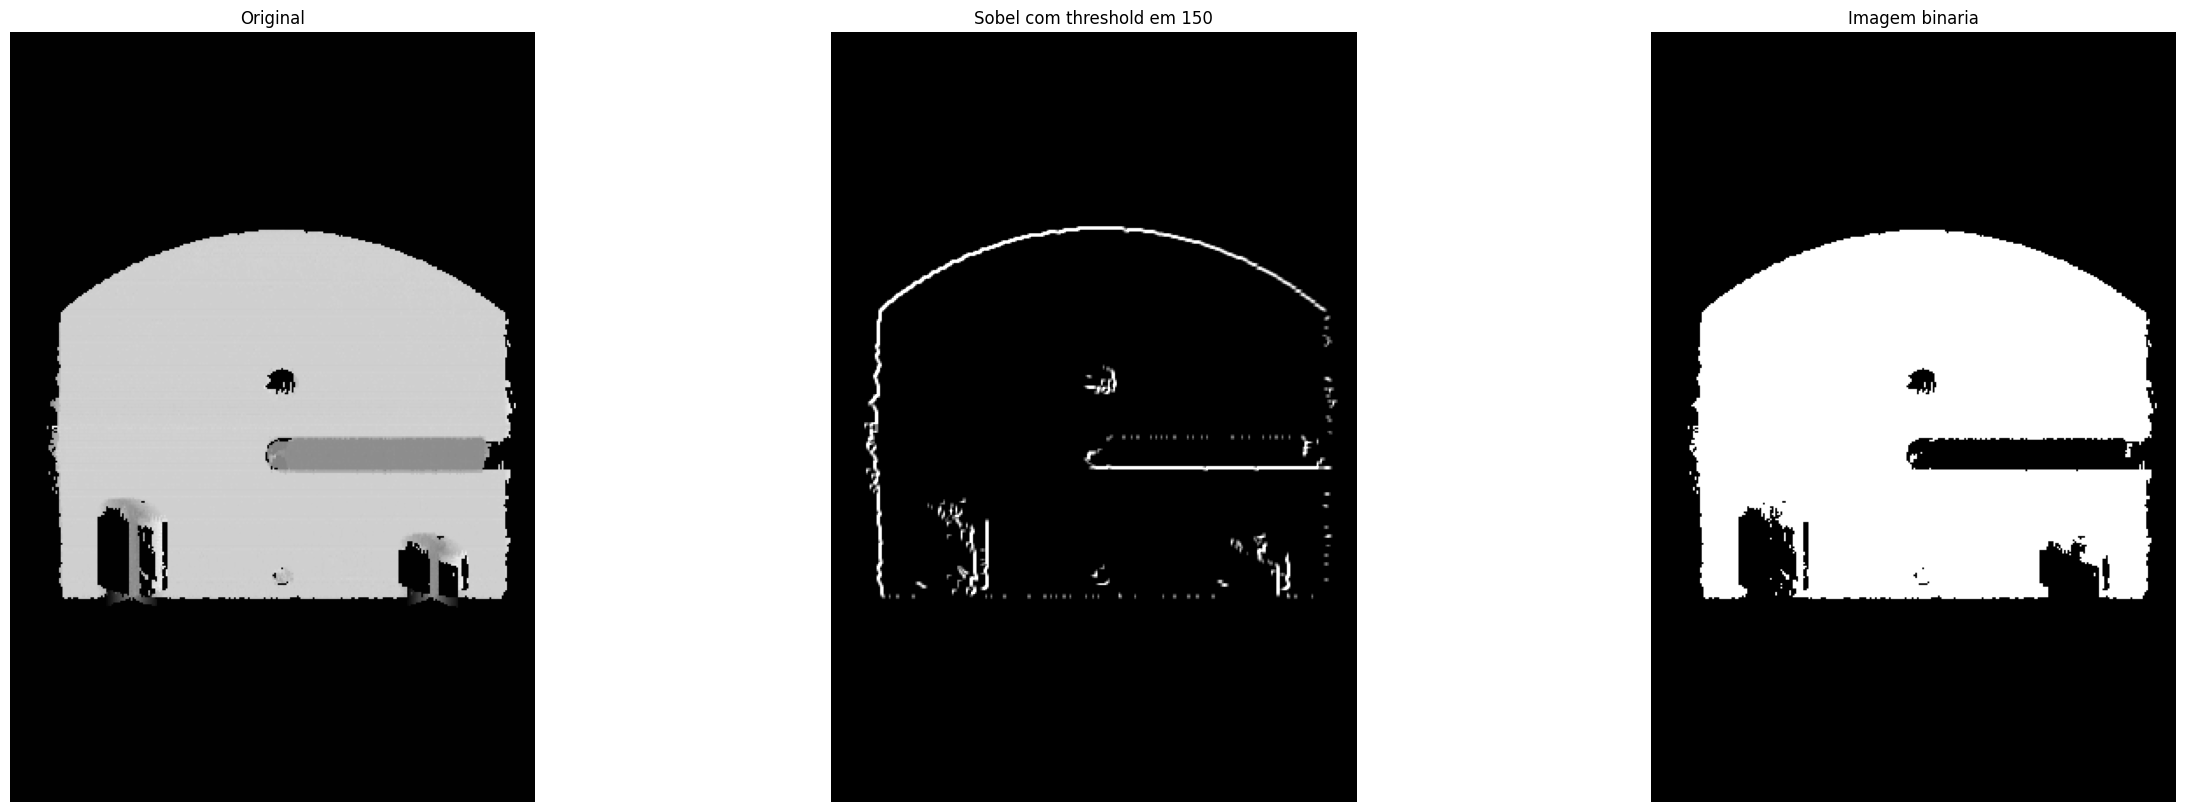

In [37]:
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)



plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title("Original")

binary_image = (img1 > 150).astype(np.uint8) * 255

sobel_x, sobel_y = sobel(binary_image * 0.25)

new_img = sobel_x  + sobel_y

plt.subplot(1,3,2)
plt.imshow(new_img, cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Sobel com threshold em 150")

plt.subplot(1,3,3)
plt.imshow(binary_image, cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Imagem binaria")

plt.show()

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

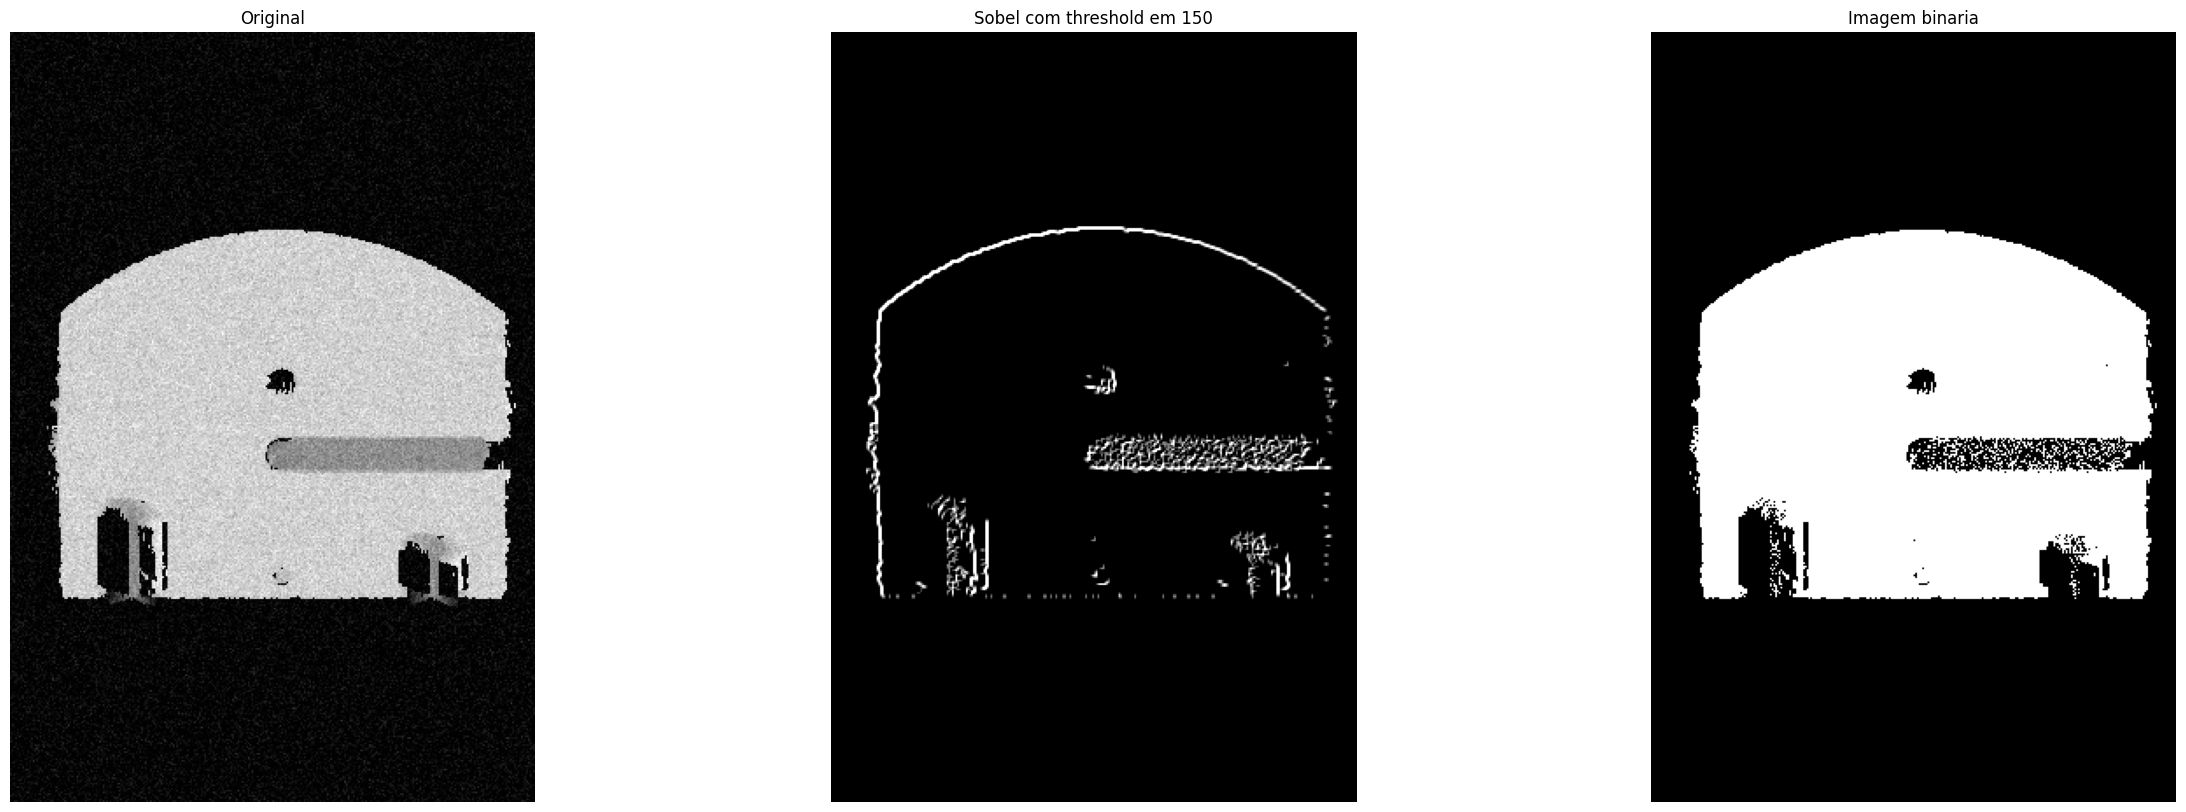

In [38]:
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title("Original")

binary_image = (img1 > 150).astype(np.uint8) * 255

sobel_x, sobel_y = sobel(binary_image * 0.25)

new_img = sobel_x  + sobel_y

plt.subplot(1,3,2)
plt.imshow(new_img, cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Sobel com threshold em 150")

plt.subplot(1,3,3)
plt.imshow(binary_image, cmap='gray' , vmin=0, vmax=255)
plt.axis("off")
plt.title("Imagem binaria")

plt.show()